In [43]:
%matplotlib inline

import os
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import random as rng
import skimage
import ipywidgets as widgets


from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from skimage import data, exposure, io, filters, feature, measure
from skimage.color import rgb2gray

In [46]:
class Load:
    
    def __init__(self):
        return
    
    def img(file):
        img = cv.imread("../res/"+file+".jpg")
        return img
    def photo(i):
        photos = []
        for j in range(1, 19):
            photos.append('projekt' + str(j))
        plt.imshow(Load.img(photos[i]))
        return 

In [47]:
a = interact(Load.photo, i=(0,17, 1));

interactive(children=(IntSlider(value=8, description='i', max=17), Output()), _dom_classes=('widget-interact',…

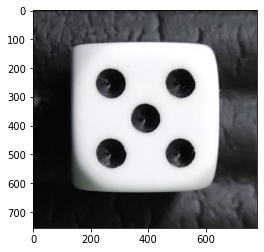

In [6]:
latwe0 = Load.img("latwe0")
plt.imshow(latwe0)

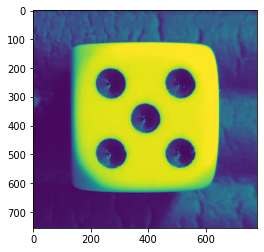

In [4]:
latwe0_grayscale = cv.cvtColor(latwe0, cv.COLOR_RGB2GRAY)
plt.imshow(latwe0_grayscale)

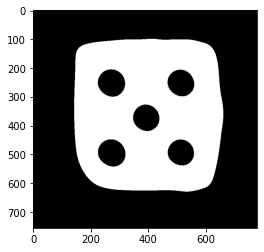

In [5]:
blur = skimage.filters.gaussian(latwe0_grayscale, sigma=20)
thresh = skimage.filters.threshold_otsu(blur)
mask = (blur > thresh)
latwe0_normalized = mask.astype(np.uint8)
plt.imshow(latwe0_normalized, cmap='gray')

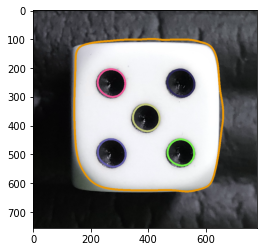

In [6]:
contours, hierarchy = cv.findContours(latwe0_normalized, cv.RETR_TREE, cv.CHAIN_APPROX_NONE) 
drawing = np.zeros((latwe0_normalized.shape[0], latwe0_normalized.shape[1], 3), dtype=np.uint8)
for i in range(len(contours)):
    color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
    cv.drawContours(latwe0, contours, i, color, 5, cv.LINE_8, hierarchy, 0)
plt.imshow(latwe0, cmap='gray')

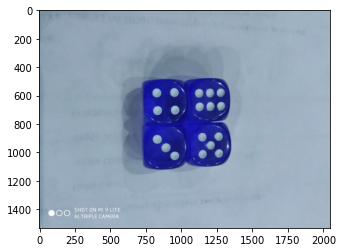

In [7]:
projekt1 = Load.img("projekt10")
plt.imshow(projekt1)
interact()

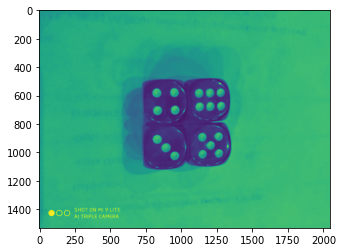

In [63]:
projekt1_grayscale = cv.cvtColor(projekt1, cv.COLOR_RGB2GRAY)
plt.imshow(projekt1_grayscale)

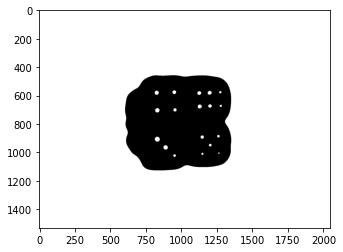

In [64]:
blur = skimage.filters.gaussian(projekt1_grayscale, sigma=20)
thresh = skimage.filters.threshold_otsu(blur)
mask = (blur > thresh)
projekt1_normalized = mask.astype(np.uint8)
plt.imshow(projekt1_normalized, cmap='gray')

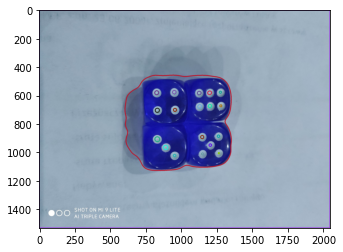

In [65]:
contours, hierarchy = cv.findContours(projekt1_normalized, cv.RETR_TREE, cv.CHAIN_APPROX_NONE) 
drawing = np.zeros((projekt1_normalized.shape[0], projekt1_normalized.shape[1], 3), dtype=np.uint8)
for i in range(len(contours)):
    color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
    cv.drawContours(projekt1, contours, i, color, 5, cv.LINE_8, hierarchy, 0)
plt.imshow(projekt1, cmap='gray')

In [66]:
print(len(contours))

20
